In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
import seaborn as sns


In [4]:
conn = sql.connect("chinook.db")

In [5]:
conn

In [9]:
conn = sql.connect("chinook.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print(table[0])

album
artist
customer
employee
genre
invoice
invoice_line
media_type
playlist
playlist_track
track
wishlist_track
wishlist


In [12]:
import sqlite3

conn = sqlite3.connect("chinook.db")
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(track);")
for col in cursor.fetchall():
    print(col)



(0, 'track_id', 'INTEGER', 1, None, 1)
(1, 'name', 'NVARCHAR(200)', 1, None, 0)
(2, 'album_id', 'INTEGER', 0, None, 0)
(3, 'media_type_id', 'INTEGER', 1, None, 0)
(4, 'genre_id', 'INTEGER', 0, None, 0)
(5, 'composer', 'NVARCHAR(220)', 0, None, 0)
(6, 'milliseconds', 'INTEGER', 1, None, 0)
(7, 'bytes', 'INTEGER', 0, None, 0)
(8, 'unit_price', 'NUMERIC(10,2)', 1, None, 0)


## Question 1

                Genre  TrackCount
0                Rock        1297
1               Latin         579
2               Metal         374
3  Alternative & Punk         332
4                Jazz         130
5            TV Shows          93
6               Blues          81
7           Classical          74
8               Drama          64
9            R&B/Soul          61


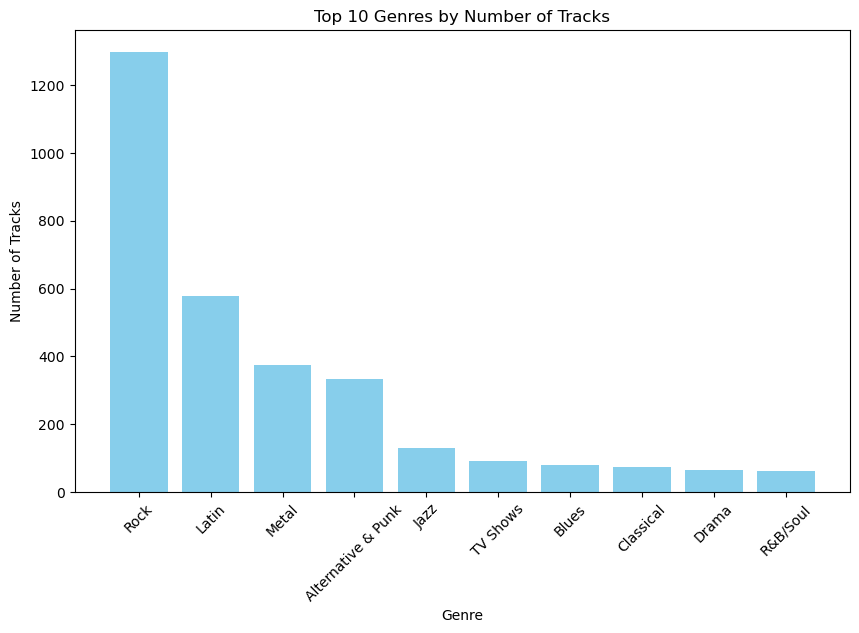

In [13]:
import matplotlib.pyplot as plt

# Query
query = """
SELECT g.name AS Genre, COUNT(t.track_id) AS TrackCount
FROM genre g
JOIN track t ON g.genre_id = t.genre_id
GROUP BY g.genre_id, g.name
ORDER BY TrackCount DESC
LIMIT 10;
"""


df = pd.read_sql_query(query, conn)


print(df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['Genre'], df['TrackCount'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Genres by Number of Tracks")
plt.show()

## Question 2

                                        Album  TrackCount
0                               Greatest Hits          57
1                              Minha Historia          34
2                                   Unplugged          30
3                              Lost, Season 3          26
4                              Lost, Season 1          25
5                        The Office, Season 3          25
6  My Way: The Best Of Frank Sinatra [Disc 1]          24
7                              Lost, Season 2          24
8    Battlestar Galactica (Classic), Season 1          24
9                              Afrociberdelia          23


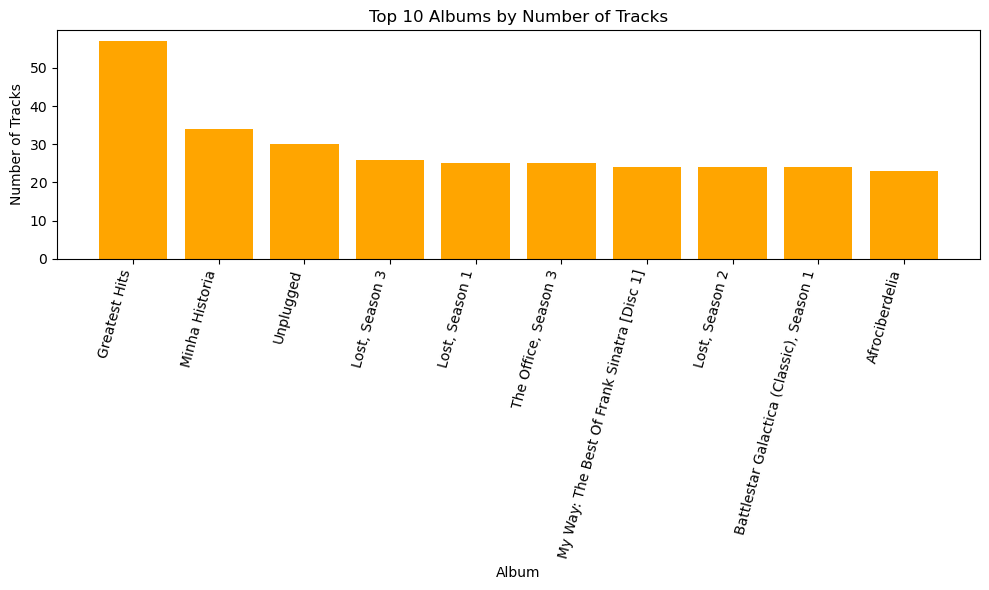

In [14]:
query = """
SELECT a.title AS Album, COUNT(t.track_id) AS TrackCount
FROM album a
JOIN track t ON a.album_id = t.album_id
GROUP BY a.album_id, a.title
ORDER BY TrackCount DESC
LIMIT 10;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['Album'], df['TrackCount'], color='orange')
plt.xticks(rotation=75, ha='right')
plt.xlabel("Album")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Albums by Number of Tracks")
plt.tight_layout()
plt.show()


## Question 3

                Customer  TotalSpent
0  František Wichterlová      144.54
1            Helena Holý      128.70
2          Hugh O'Reilly      114.84
3           Manoj Pareek      111.87
4         Luís Gonçalves      108.90
5         Fernanda Ramos      106.92
6         João Fernandes      102.96
7      François Tremblay       99.99
8           Wyatt Girard       99.99
9             Jack Smith       98.01


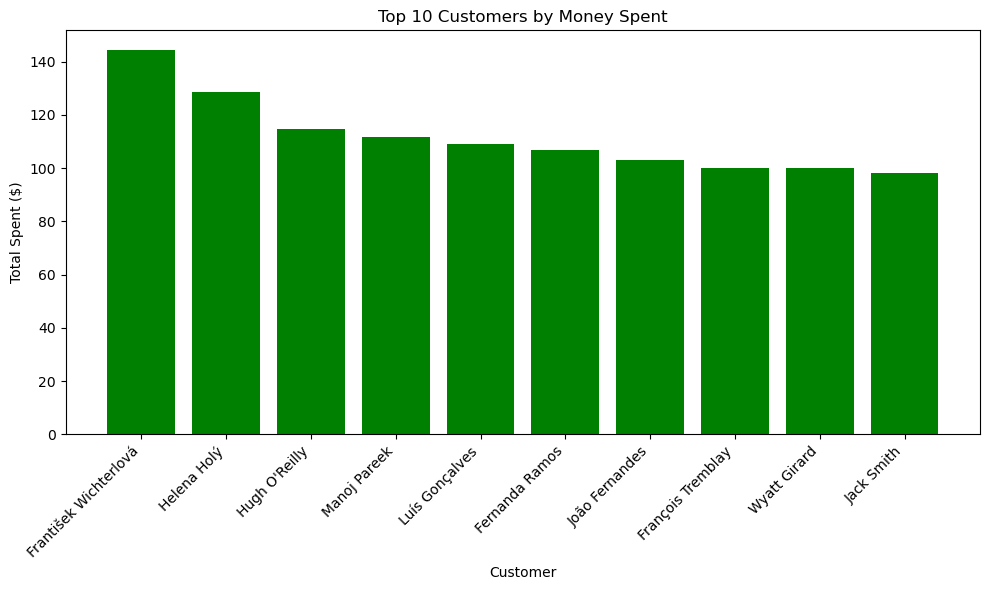

In [15]:
query = """
SELECT c.first_name || ' ' || c.last_name AS Customer, 
       SUM(il.unit_price * il.quantity) AS TotalSpent
FROM customer c
JOIN invoice i ON c.customer_id = i.customer_id
JOIN invoice_line il ON i.invoice_id = il.invoice_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY TotalSpent DESC
LIMIT 10;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['Customer'], df['TotalSpent'], color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Customer")
plt.ylabel("Total Spent ($)")
plt.title("Top 10 Customers by Money Spent")
plt.tight_layout()
plt.show()


## Question 4

                  Artist  TotalRevenue
0                  Queen        190.08
1           Jimi Hendrix        185.13
2                Nirvana        128.70
3  Red Hot Chili Peppers        128.70
4              Pearl Jam        127.71


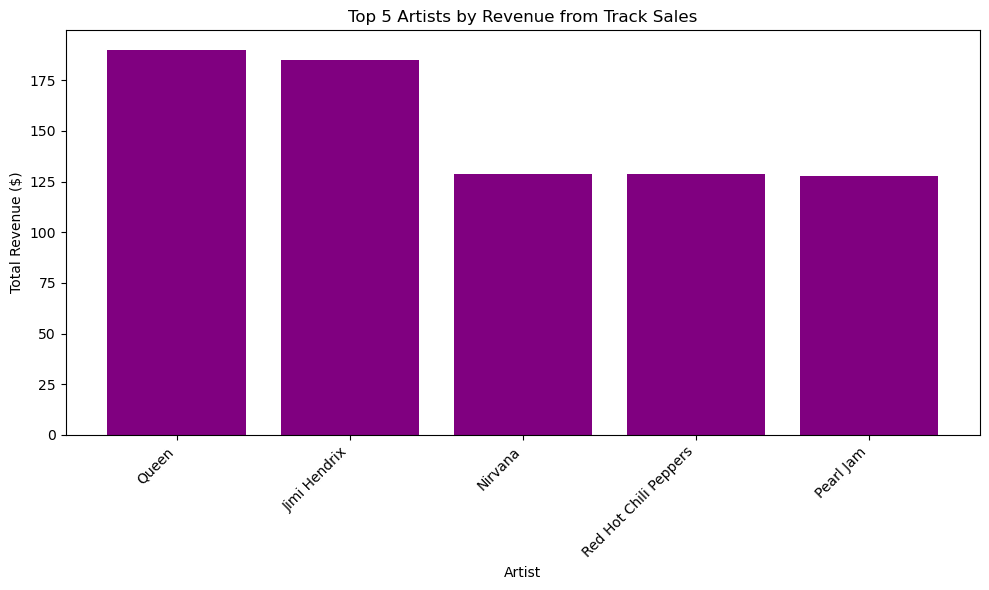

In [16]:
query = """
SELECT ar.name AS Artist,
       SUM(il.unit_price * il.quantity) AS TotalRevenue
FROM artist ar
JOIN album al ON ar.artist_id = al.artist_id
JOIN track t ON al.album_id = t.album_id
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY ar.artist_id, ar.name
ORDER BY TotalRevenue DESC
LIMIT 5;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['Artist'], df['TotalRevenue'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Artist")
plt.ylabel("Total Revenue ($)")
plt.title("Top 5 Artists by Revenue from Track Sales")
plt.tight_layout()
plt.show()


## Question 5

           Country  AvgRevenuePerInvoice
0            Spain                  0.99
1           Poland                  0.99
2      Netherlands                  0.99
3           Canada                  0.99
4   United Kingdom                  0.99
5              USA                  0.99
6         Portugal                  0.99
7           Norway                  0.99
8            Italy                  0.99
9          Ireland                  0.99
10           India                  0.99
11         Germany                  0.99
12          France                  0.99
13         Finland                  0.99
14  Czech Republic                  0.99
15           Chile                  0.99
16          Brazil                  0.99
17         Belgium                  0.99
18         Austria                  0.99
19       Argentina                  0.99
20          Sweden                  0.99
21         Hungary                  0.99
22         Denmark                  0.99
23       Austral

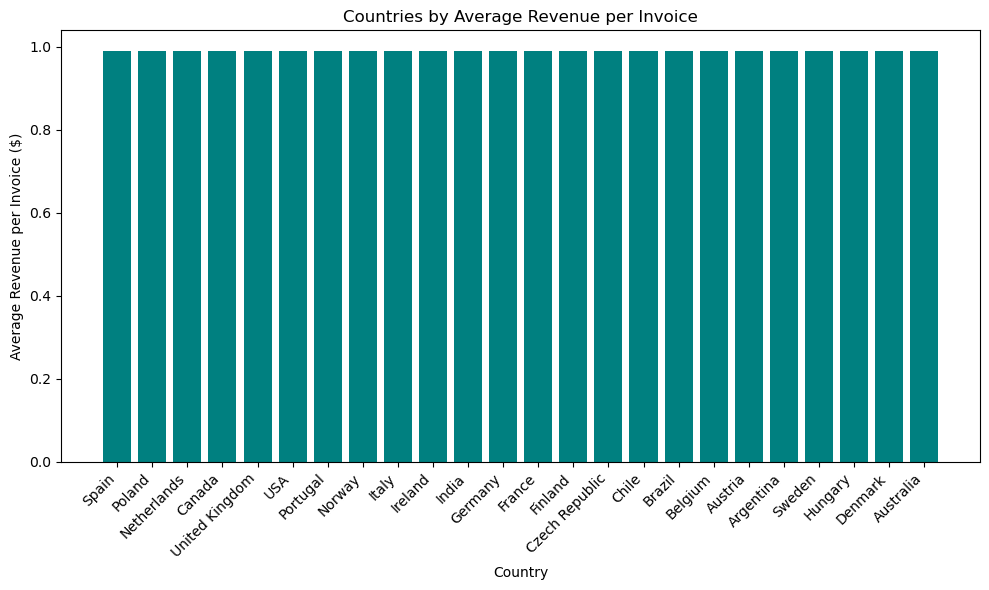

In [17]:
query = """
SELECT i.billing_country AS Country,
       AVG(il.unit_price * il.quantity) AS AvgRevenuePerInvoice
FROM invoice i
JOIN invoice_line il ON i.invoice_id = il.invoice_id
GROUP BY i.billing_country
ORDER BY AvgRevenuePerInvoice DESC;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(df['Country'], df['AvgRevenuePerInvoice'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Average Revenue per Invoice ($)")
plt.title("Countries by Average Revenue per Invoice")
plt.tight_layout()
plt.show()


## Question 6

                     MediaType  TrackCount
0              MPEG audio file        3034
1     Protected AAC audio file         237
2  Protected MPEG-4 video file         214
3               AAC audio file          11
4     Purchased AAC audio file           7


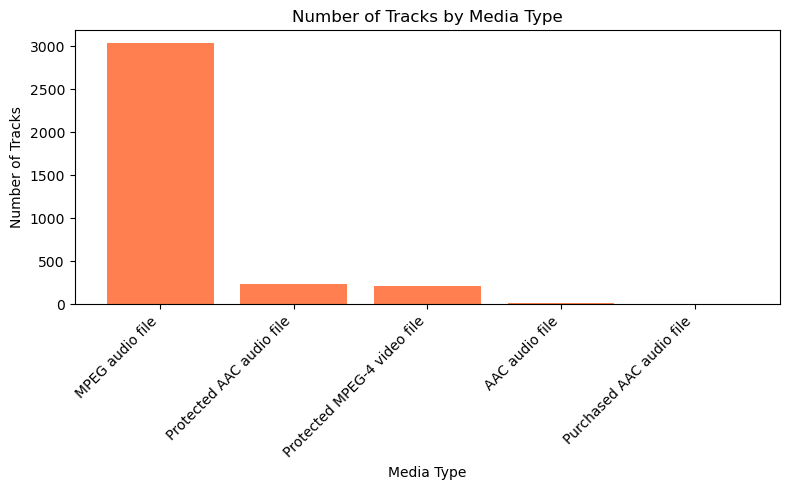

In [18]:
query = """
SELECT m.name AS MediaType, COUNT(t.track_id) AS TrackCount
FROM media_type m
JOIN track t ON m.media_type_id = t.media_type_id
GROUP BY m.media_type_id, m.name
ORDER BY TrackCount DESC;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(df['MediaType'], df['TrackCount'], color='coral')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Media Type")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks by Media Type")
plt.tight_layout()
plt.show()


## Question 7

In [19]:
query = """
SELECT ar.name AS Artist, COUNT(DISTINCT t.genre_id) AS GenreCount
FROM artist ar
JOIN album al ON ar.artist_id = al.artist_id
JOIN track t ON al.album_id = t.album_id
GROUP BY ar.artist_id, ar.name
HAVING COUNT(DISTINCT t.genre_id) > 1
ORDER BY GenreCount DESC, Artist ASC;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)


                   Artist  GenreCount
0             Iron Maiden           4
1              Audioslave           3
2    Battlestar Galactica           3
3            Gilberto Gil           3
4              Jamiroquai           3
5           Lenny Kravitz           3
6         Various Artists           3
7           Amy Winehouse           2
8    Antônio Carlos Jobim           2
9            Eric Clapton           2
10          Faith No More           2
11           Foo Fighters           2
12          Guns N' Roses           2
13                 Heroes           2
14                   Lost           2
15          Ozzy Osbourne           2
16              Pearl Jam           2
17                 R.E.M.           2
18  Red Hot Chili Peppers           2
19             The Office           2
20                     U2           2


## Question 8

In [20]:
query = """
SELECT name AS TrackName, milliseconds
FROM track
ORDER BY milliseconds DESC
LIMIT 10;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Display DataFrame
print(df)


                     TrackName  milliseconds
0       Occupation / Precipice       5286953
1      Through a Looking Glass       5088838
2  Greetings from Earth, Pt. 1       2960293
3      The Man With Nine Lives       2956998
4  Battlestar Galactica, Pt. 2       2956081
5  Battlestar Galactica, Pt. 1       2952702
6    Murder On the Rising Star       2935894
7  Battlestar Galactica, Pt. 3       2927802
8            Take the Celestra       2927677
9                Fire In Space       2926593


## Question 9

                  Artist  TotalRevenue  RevenueShare
0                  Queen        190.08     25.000000
1           Jimi Hendrix        185.13     24.348958
2                Nirvana        128.70     16.927083
3  Red Hot Chili Peppers        128.70     16.927083
4              Pearl Jam        127.71     16.796875


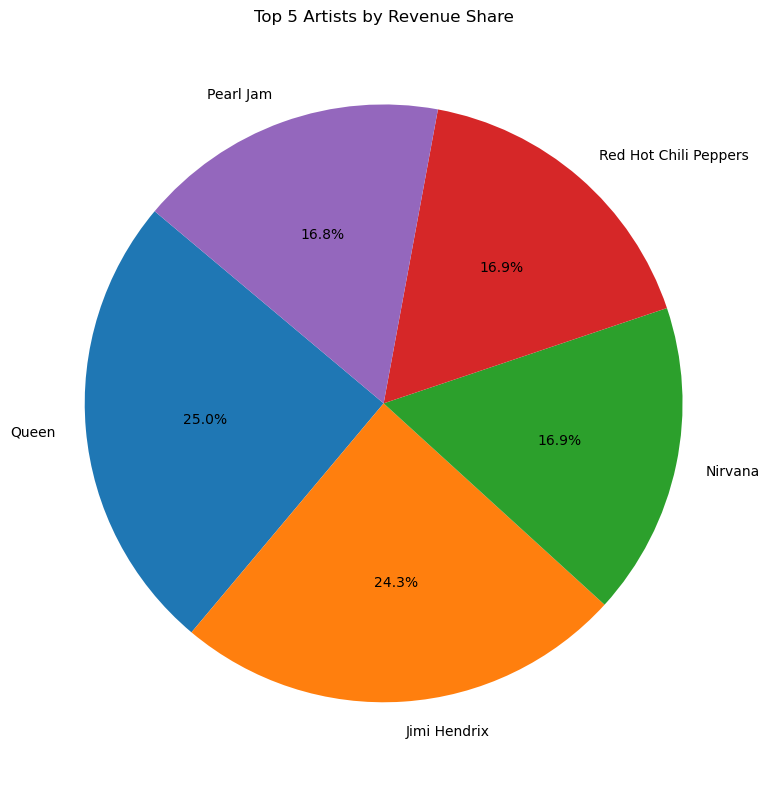

In [21]:
query = """
SELECT ar.name AS Artist,
       SUM(il.unit_price * il.quantity) AS TotalRevenue
FROM artist ar
JOIN album al ON ar.artist_id = al.artist_id
JOIN track t ON al.album_id = t.album_id
JOIN invoice_line il ON t.track_id = il.track_id
GROUP BY ar.artist_id, ar.name
ORDER BY TotalRevenue DESC
LIMIT 5;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Calculate percentage share
df['RevenueShare'] = (df['TotalRevenue'] / df['TotalRevenue'].sum()) * 100

# Display DataFrame
print(df)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(df['RevenueShare'], labels=df['Artist'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Artists by Revenue Share")
plt.tight_layout()
plt.show()


## Question 10

Genre           Latin   Metal    Rock
Country                              
Argentina        1.98    1.98   10.89
Australia        1.98   13.86   33.66
Austria          0.99    6.93   39.60
Belgium          1.98   18.81   25.74
Brazil          12.87   72.27  202.95
Canada          12.87   71.28  329.67
Chile            3.96   10.89   60.39
Czech Republic  20.79   22.77  141.57
Denmark          0.00    4.95   23.76
Finland          1.98    9.90   45.54
France          26.73   53.46  208.89
Germany          7.92   43.56  192.06
Hungary          0.99   18.81   43.56
India            5.94   21.78  100.98
Ireland         19.80    5.94   71.28
Italy            0.99    3.96   34.65
Netherlands      0.00    4.95   32.67
Norway           0.99   16.83   39.60
Poland           0.99    8.91   39.60
Portugal         5.94   27.72  106.92
Spain            4.95   12.87   45.54
Sweden           1.98    6.93   59.40
USA             21.78  122.76  555.39
United Kingdom   6.93   30.69  164.34


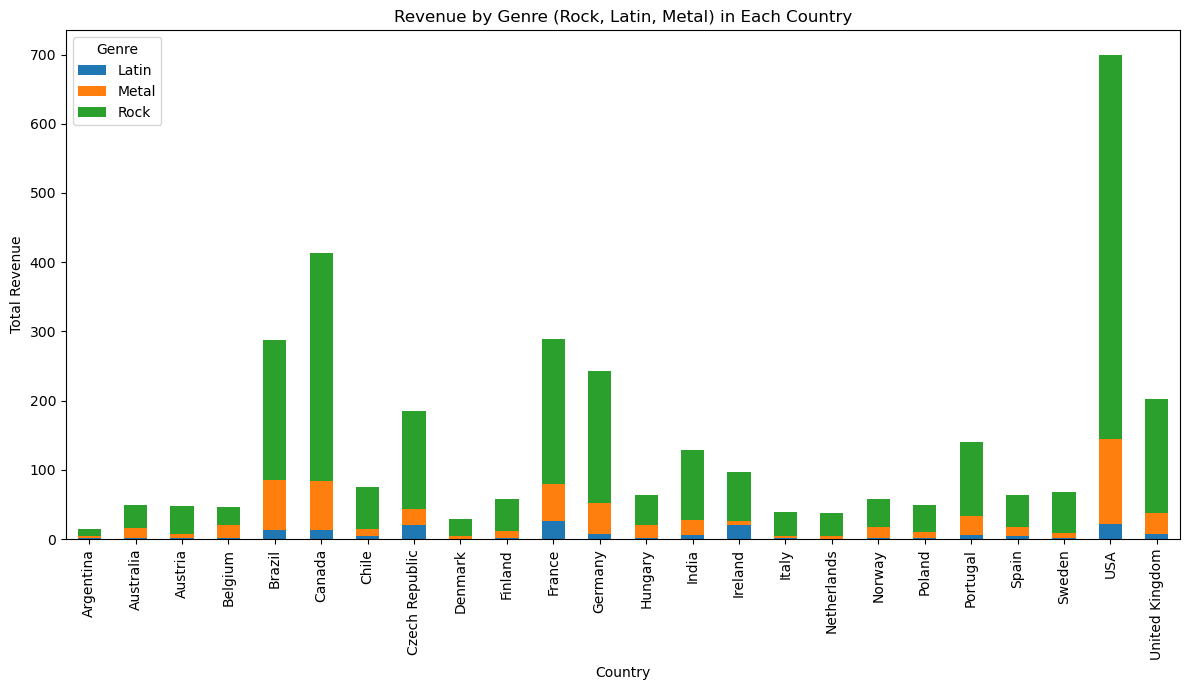

In [22]:
query = """
SELECT c.country AS Country,
       g.name AS Genre,
       SUM(il.unit_price * il.quantity) AS TotalRevenue
FROM invoice i
JOIN customer c ON i.customer_id = c.customer_id
JOIN invoice_line il ON i.invoice_id = il.invoice_id
JOIN track t ON il.track_id = t.track_id
JOIN genre g ON t.genre_id = g.genre_id
WHERE g.name IN ('Rock', 'Latin', 'Metal')
GROUP BY c.country, g.name
ORDER BY c.country, g.name;
"""

# Read query into DataFrame
df = pd.read_sql_query(query, conn)

# Pivot data for stacked bar chart
pivot_df = df.pivot(index='Country', columns='Genre', values='TotalRevenue').fillna(0)

# Display DataFrame
print(pivot_df)

# Plot stacked column chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,7))
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Revenue by Genre (Rock, Latin, Metal) in Each Country")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()
